In [44]:
import numpy as np
import PIL
import PIL.Image as Image
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import torch
import torch.nn as nn
import cv2

In [2]:
def convolve(img,filter):
    m,n = img.shape
    k,a = filter.shape[0],filter.shape[0]//2
    ret = np.zeros_like(img)
    for i in range(a,m-a):
        for j in range(a,n-a):
            ret[i,j] = np.sum(img[i-a:i+a+1,j-a:j+a+1]*filter)
    return ret
            

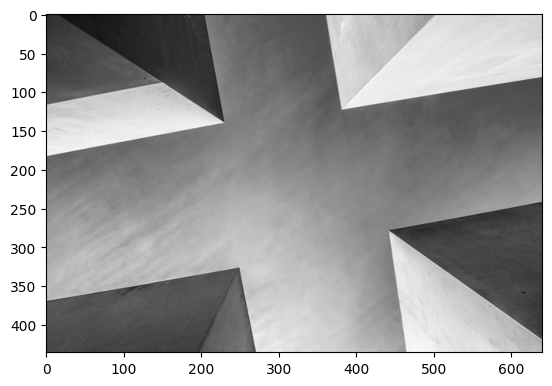

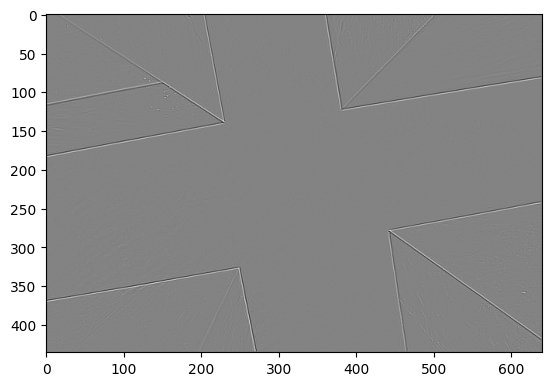

In [108]:
img = np.array(Image.open('../geom.jpg').convert('L'))/255.0
plt.imshow(img,cmap='gray')
plt.show()
sobel_x = np.array([
    [1,0,-1],
    [2,0,-1],
    [1,0,-1]
])
sobel_y = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
laplacian = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])
ret = convolve(img,laplacian)
plt.imshow(ret,cmap='gray')
plt.show()


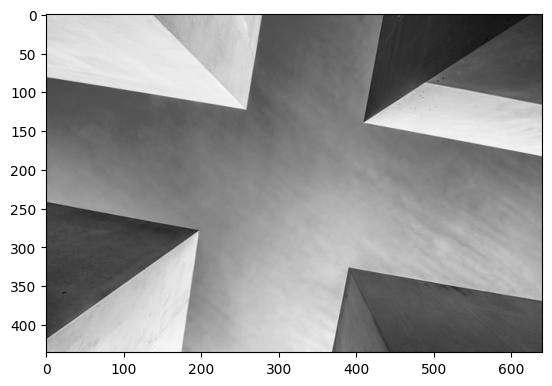

In [28]:

def apply_affine(img,affine_matrix):
    m,n = img.shape
    ret = np.zeros_like(img)
    for i in range(m):
        for j in range(n):
            [i_,j_,_] = affine_matrix @  [i,j,1]
            i_ = int(i_)
            j_ = int(j_)
            if i_>=m or i_<0 or j_>=n or j<0:
                continue
            ret[i_,j_] = img[i,j]
    return ret

img = np.array(Image.open('../geom.jpg').convert('L'))/255.0
# mirroring
new_img = img[:,::-1]
theta = np.deg2rad(45)
rotation_matrix = np.array([
    [np.cos(theta),-np.sin(theta),0],
    [np.sin(theta),np.cos(theta),0],
    [0,0,1]
])
#new_img = apply_affine(new_img,rotation_matrix)
plt.imshow(new_img,cmap='gray')
plt.show()



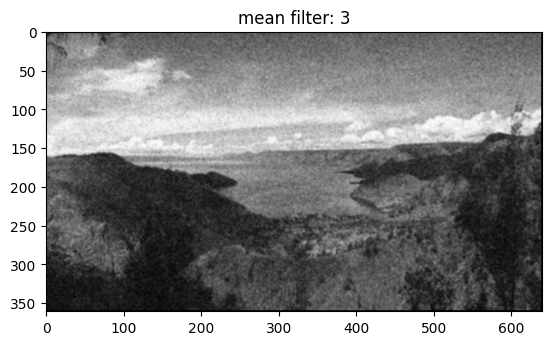

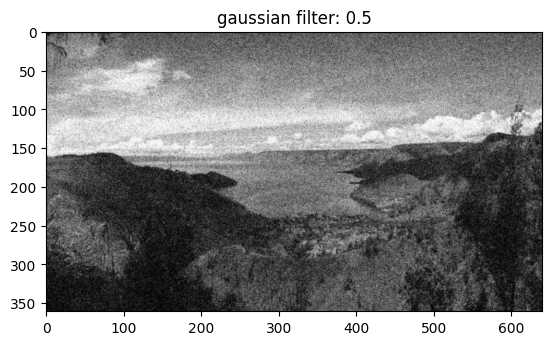

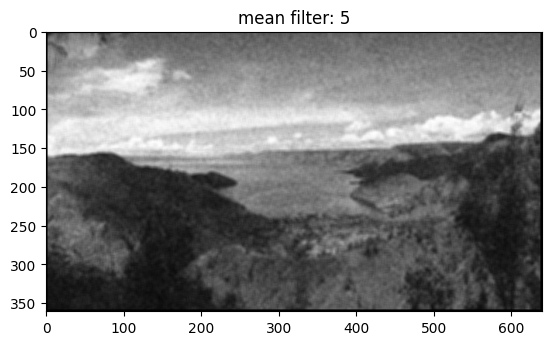

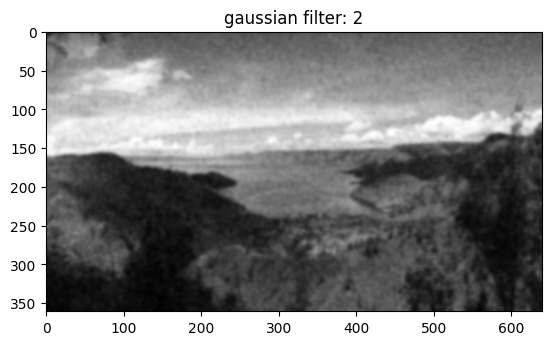

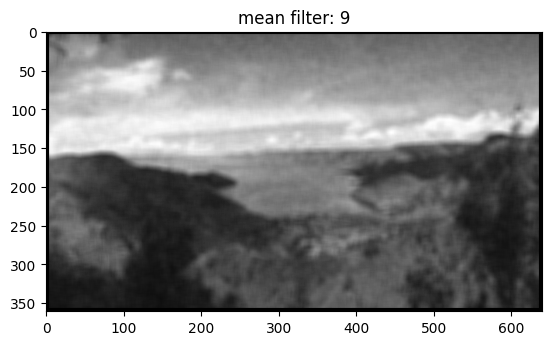

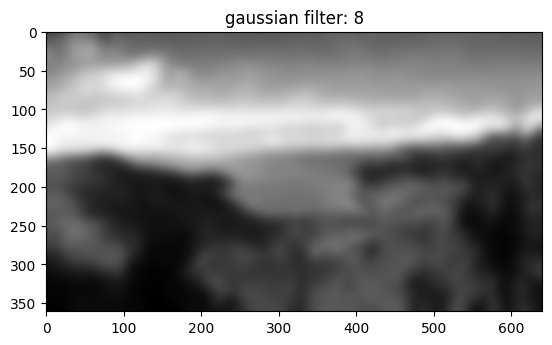

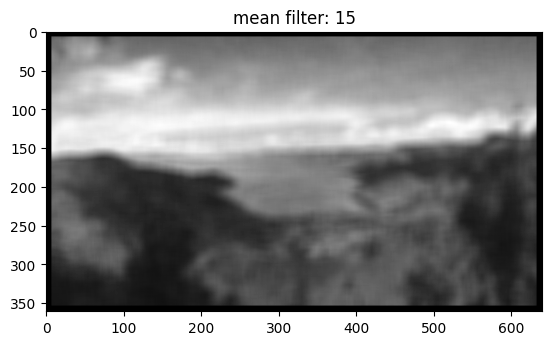

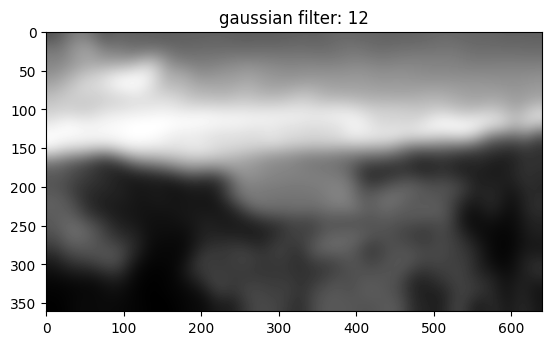

In [32]:
img = np.array(Image.open('../nature2.jpg').convert('L'))/255.0
def get_mean_filter(k):
    return np.ones((k,k))*(1/k)

for k,sigma in zip([3,5,9,15],[0.5,2,8,12]):
    img_mean = convolve(img,get_mean_filter(k))
    img_gauss = ndimage.gaussian_filter(img,sigma)
    plt.imshow(img_mean,cmap='gray')
    plt.title(f'mean filter: {k}')
    plt.show()
    plt.imshow(img_gauss,cmap='gray')
    plt.title(f'gaussian filter: {sigma}')
    plt.show()

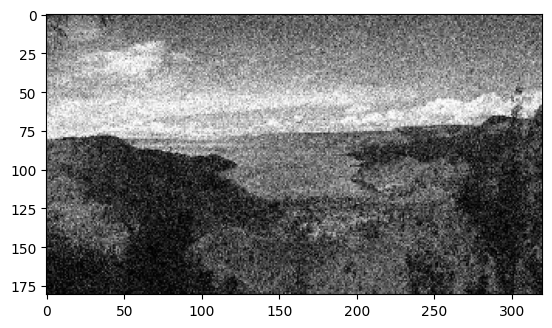

In [49]:
img = np.array(Image.open('../nature2.jpg').convert('L'))/255.0
def reduce_dimension(img,t):
    return img[::t,::t]

img_ret = reduce_dimension(img,2)
plt.imshow(img_ret,cmap='gray')

In [58]:
conv1 = nn.Conv2d(3,3,kernel_size=(3,3),dilation=1,padding=2)
conv2 = nn.Conv2d(3,3,kernel_size=(3,3),stride=(2,4))

x = torch.rand((1,3,200,200))
y = conv2(conv1(x))
y.shape

torch.Size([1, 3, 100, 50])

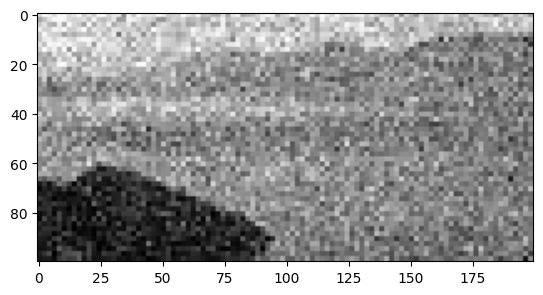

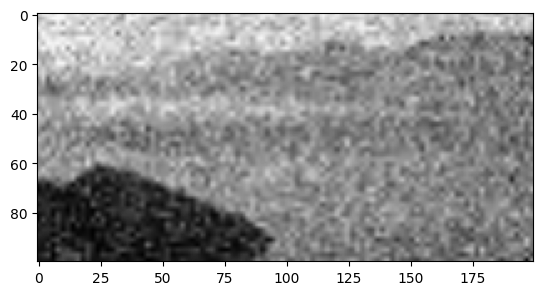

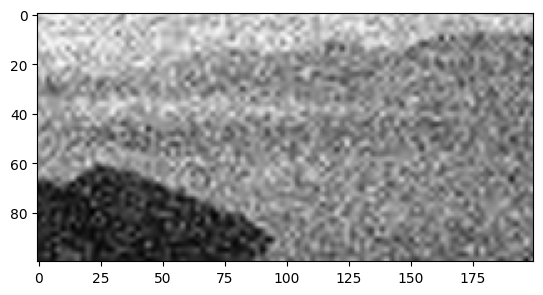

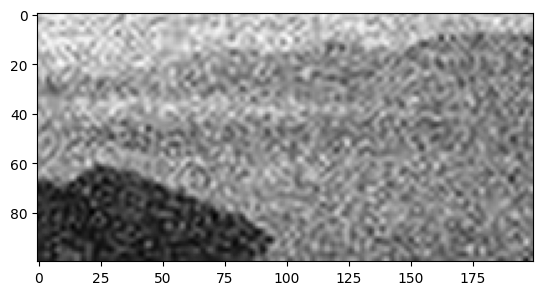

In [80]:
plt.imshow(ndimage.zoom(img[150:200,200:300],zoom=2,order=0),cmap='gray')
plt.show()
plt.imshow(ndimage.zoom(img[150:200,200:300],zoom=2,order=1),cmap='gray')
plt.show()
plt.imshow(ndimage.zoom(img[150:200,200:300],zoom=2,order=2),cmap='gray')
plt.show()
plt.imshow(ndimage.zoom(img[150:200,200:300],zoom=2,order=5),cmap='gray')
plt.show()

In [94]:
img = np.array(Image.open('../nature2.jpg').convert('L'))/255.0
m,n = img.shape
img = img.reshape(1,1,m,n)
img.shape
img = torch.tensor(img,dtype=float)

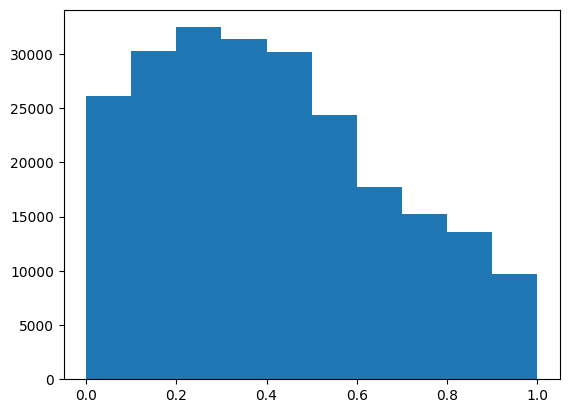

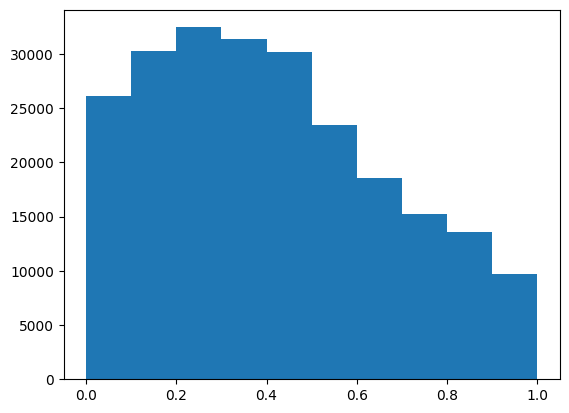

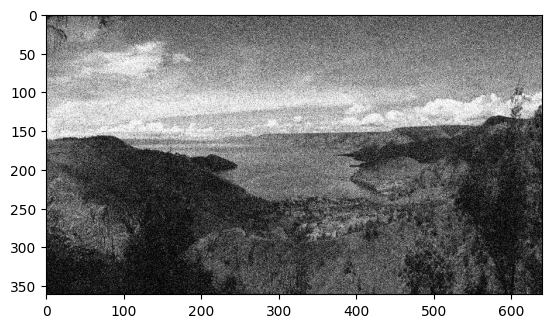

In [107]:
img = np.array(Image.open('../nature2.jpg').convert('L'))/255.0
plt.hist(img.reshape(-1))
plt.show()
m,n = img.shape
img = img.reshape(1,1,m,n)
img.shape
img = torch.tensor(img,dtype=float)
lrn = nn.LocalResponseNorm()
img_ret = lrn(img).permute(0,2,3,1).detach().numpy().reshape((361, 640, 1))

plt.hist(img_ret.reshape(-1))
plt.show()

plt.imshow(img_ret,cmap='gray')
plt.show()

In [12]:
img = np.array(Image.open('../nature2.jpg').convert('L'))/255.0
m,n = img.shape
img = img.reshape(1,1,m,n)
img = torch.tensor(img,dtype=torch.float32)
dc = nn.Conv2d(1,1,kernel_size=3,dilation=1)
print(dc(img).shape)
dc = nn.Conv2d(1,1,kernel_size=3,dilation=6)
print(dc(img).shape)
dc = nn.Conv2d(1,1,kernel_size=3,dilation=10)
print(dc(img).shape)

torch.Size([1, 1, 359, 638])
torch.Size([1, 1, 349, 628])
torch.Size([1, 1, 341, 620])


In [13]:
import cv2

In [ ]:
cv2.rectangle()

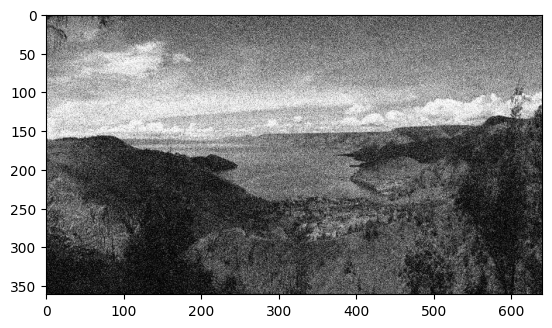

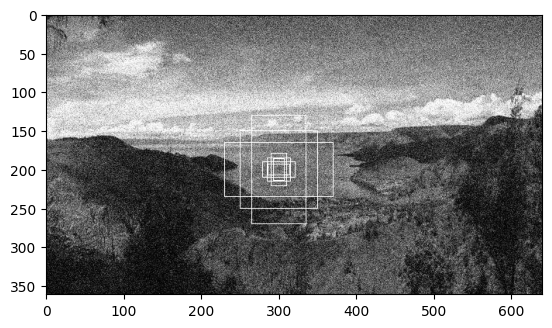

In [30]:
def draw_anchor(img,point,size,aspect_ratio,t=1):
    x,y = point
    w = int(size*np.sqrt(aspect_ratio))
    h = int(size*np.sqrt(1./aspect_ratio))
    img = img.copy()
    img[x-w//2:x+w//2+1,y-h//2:y-h//2+t] = 1.
    img[x-w//2:x+w//2+1,y+h//2:y+h//2+t] = 1.
    img[x-w//2:x-w//2+t,y-h//2:y+h//2+1] = 1.
    img[x+w//2:x+w//2+t,y-h//2:y+h//2+1] = 1.

    return img

img = np.array(Image.open('../nature2.jpg').convert('L'))/255.0
  
plt.imshow(img,cmap='gray')
plt.show()  

for size in [20,30,100]:
    for ar in [0.5,1,2]:
        img = draw_anchor(img,(200,300),size,ar)
plt.imshow(img,cmap='gray')
plt.show()  

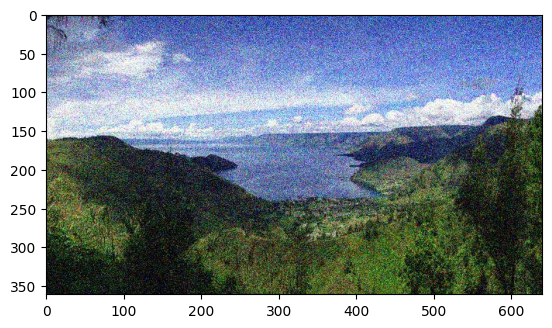

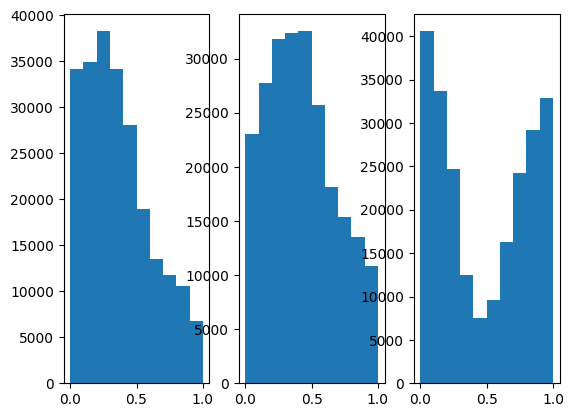

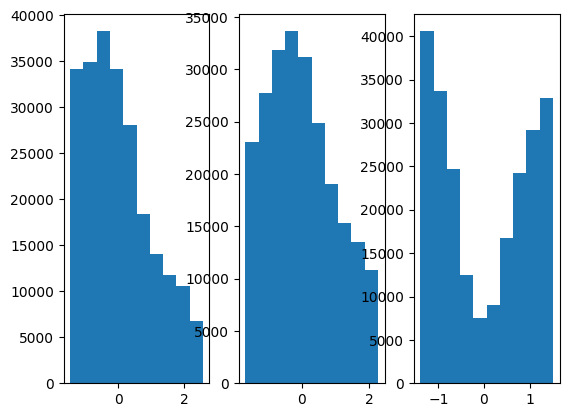

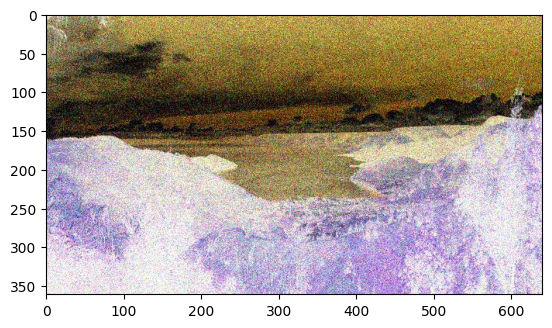

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


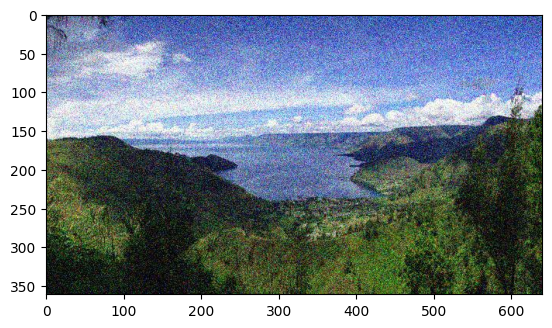

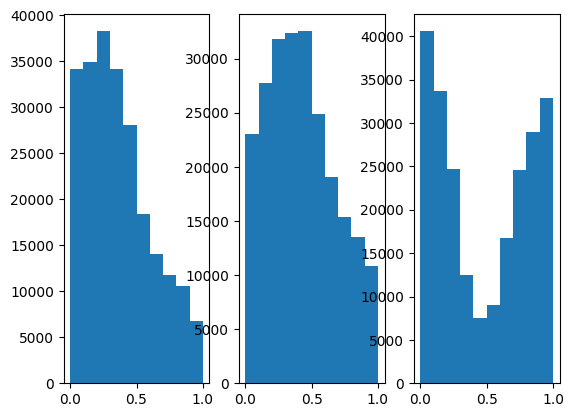

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
img = np.array(Image.open('../nature2.jpg').convert('RGB'))/255.0
# plot original image
plt.imshow(img)
plt.show()
# plot histogram of each channel in subplot
plt.subplot(1,3,1)
plt.hist(img[:,:,0].reshape(-1))
plt.subplot(1,3,2)
plt.hist(img[:,:,1].reshape(-1))
plt.subplot(1,3,3)
plt.hist(img[:,:,2].reshape(-1))
plt.show()


img = img.reshape(1,*img.shape)
# apply batch norm layer
img = torch.tensor(img,dtype=torch.float32)
img = img.permute(0,3,1,2)
bn = nn.BatchNorm2d(3)
img_bn = bn(img)
img_bn = img_bn.permute(0,2,3,1).detach().numpy().reshape((361, 640, 3))
plt.subplot(1,3,1)
plt.hist(img_bn[:,:,0].reshape(-1))
plt.subplot(1,3,2)
plt.hist(img_bn[:,:,1].reshape(-1))
plt.subplot(1,3,3)
plt.hist(img_bn[:,:,2].reshape(-1))
plt.show()

# invert the colors
img_inv = 1 - img
# plot the inverted image
plt.imshow(img_inv[0].permute(1,2,0))
plt.show()
# apply batch norm layer
bn = nn.BatchNorm2d(3)
img_inv_bn = bn(img_inv)
# plot image after batch norm
plt.imshow(img_inv_bn[0].permute(1,2,0).detach().numpy())
# applay the local response norm
lrn = nn.LocalResponseNorm(100)
img_lrn = lrn(img).permute(0,2,3,1).detach().numpy().reshape((361, 640, 3))
plt.imshow(img_lrn)
plt.show()
plt.subplot(1,3,1)
plt.hist(img_lrn[:,:,0].reshape(-1))
plt.subplot(1,3,2)
plt.hist(img_lrn[:,:,1].reshape(-1))
plt.subplot(1,3,3)
plt.hist(img_lrn[:,:,2].reshape(-1))
plt.show()



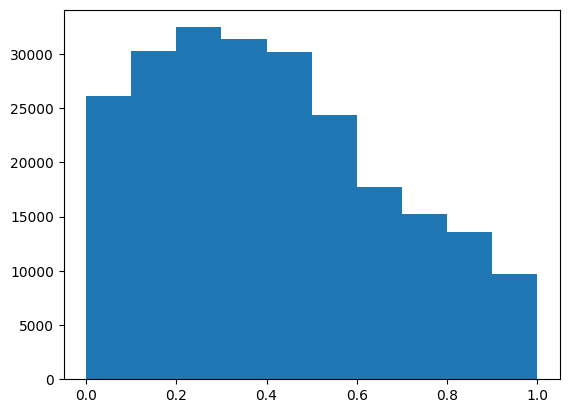

In [17]:
img = Image.open('../nature2.jpg').convert('L')
img = np.array(img)
img = img/255.0
plt.hist(img.reshape(-1))
plt.show()

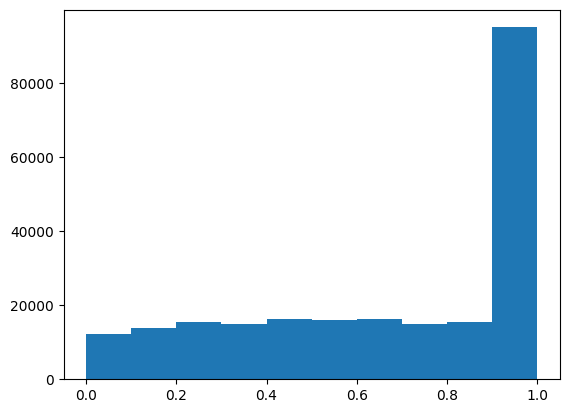

In [22]:
img_linear = img*2
np.clip(img_linear,0,1,out=img_linear)
plt.hist(img_linear.reshape(-1))
plt.show()

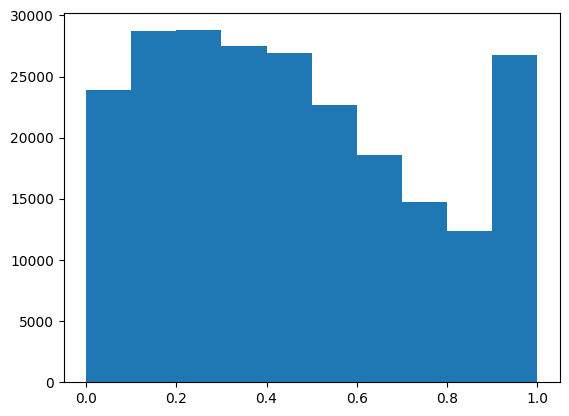

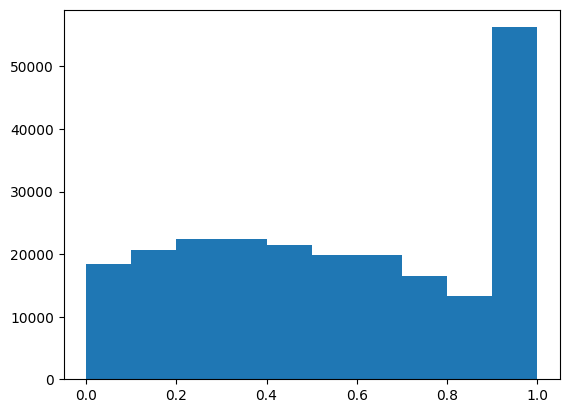

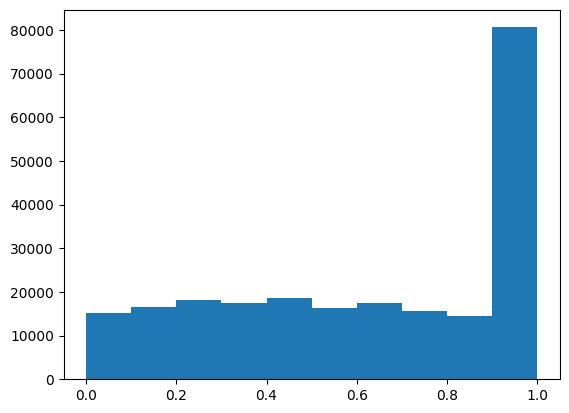

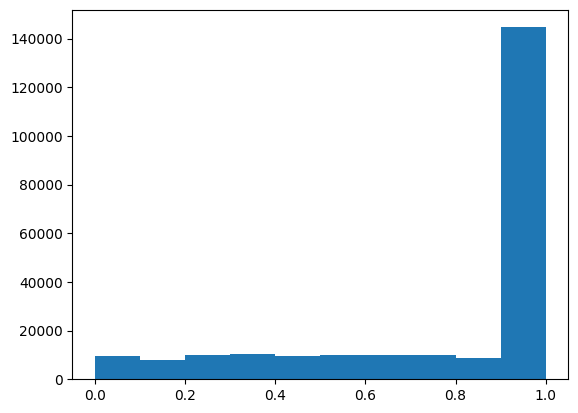

In [19]:
for i in [0.3,0.4,0.5,1]:
    img_exp = 4*(((1+i)**img)-1)
    np.clip(img_exp,0,1,out=img_exp)
    plt.hist(img_exp.reshape(-1))
    plt.show()

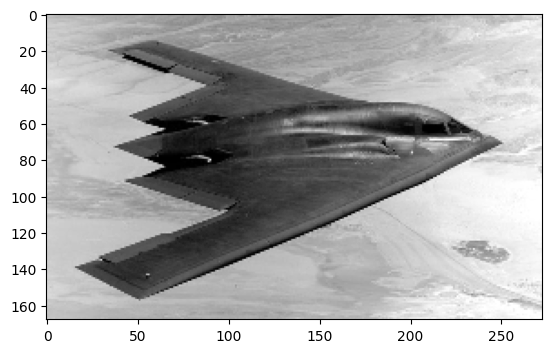

In [165]:
img = Image.open('../stealth.jpg').convert('L')
img = np.array(img)
img = img/255.0
# resize the image to half of its original size
img = cv2.resize(img,(0,0),fx=0.3,fy=0.3)
plt.imshow(img,cmap='gray')


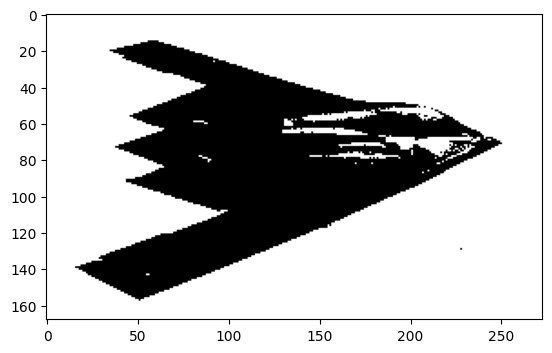

In [166]:
img_th = img.copy()
th = 0.5
img_th[img_th<th] = 0
img_th[img_th>=th] = 1
img_th = img_th.astype(np.uint8)*255
plt.imshow(img_th,cmap='gray')
plt.show()


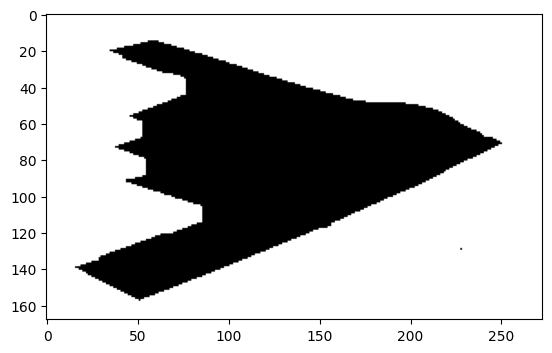

In [172]:
l = 9
kernel = np.ones((l,l),np.uint8)
plt.imshow(cv2.dilate(cv2.erode(img_th,kernel),kernel),cmap='gray')

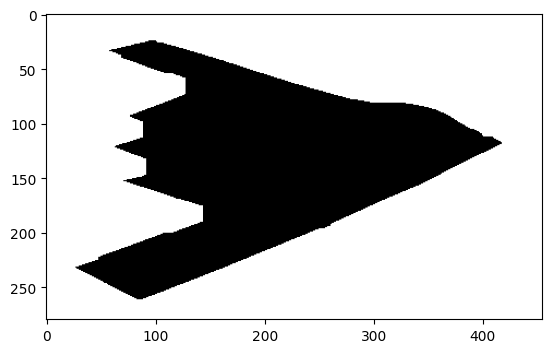

In [133]:

img_er = cv2.erode(cv2.dilate(img_th,kernel),kernel)
plt.imshow(img_er,cmap='gray')

In [6]:
img = Image.open('../stealth.jpg').convert('L')
img = np.array(img)/255.0

In [13]:
img_tmp = ndimage.gaussian_filter(img, sigma=10)
img_tmp = ndimage.gaussian_filter(img_tmp, sigma=2)

img_tmp

array([[0.76250278, 0.76240298, 0.76220438, ..., 0.86637398, 0.86637236,
        0.86637056],
       [0.76259549, 0.762496  , 0.76229802, ..., 0.86661468, 0.86661285,
        0.86661095],
       [0.76278163, 0.76268276, 0.76248603, ..., 0.86709373, 0.86709146,
        0.86708935],
       ...,
       [0.76064881, 0.76065128, 0.76065563, ..., 0.96501323, 0.96487408,
        0.96480405],
       [0.76059281, 0.76059543, 0.76060004, ..., 0.96625843, 0.96612244,
        0.966054  ],
       [0.76056551, 0.7605682 , 0.76057294, ..., 0.96688442, 0.96675007,
        0.96668244]])

In [16]:
sigma = np.sqrt(10**2+2**2)
img_tmp_2 = ndimage.gaussian_filter(img, sigma=sigma)
img_tmp_2

array([[0.7625029 , 0.7624031 , 0.76220446, ..., 0.86637404, 0.86637241,
        0.86637061],
       [0.76259562, 0.76249614, 0.76229812, ..., 0.86661482, 0.86661298,
        0.86661108],
       [0.76278167, 0.76268281, 0.76248603, ..., 0.86709406, 0.86709177,
        0.86708966],
       ...,
       [0.76064906, 0.76065153, 0.76065585, ..., 0.96501301, 0.96487391,
        0.9648039 ],
       [0.76059309, 0.7605957 , 0.76060028, ..., 0.96625822, 0.96612228,
        0.96605386],
       [0.7605658 , 0.76056848, 0.7605732 , ..., 0.96688414, 0.96674983,
        0.96668223]])

In [17]:
abs(img_tmp-img_tmp_2).sum()

0.29503228768891443

tensor(654.3516)
tensor(201.8365)


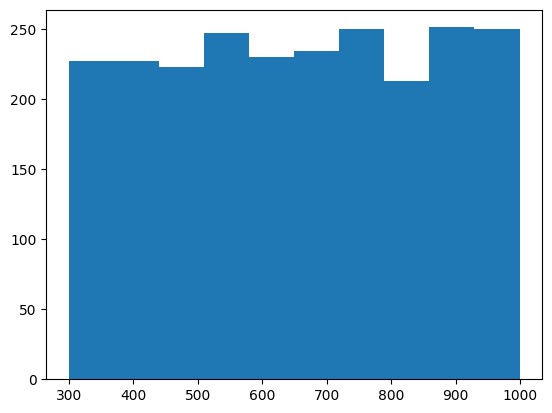

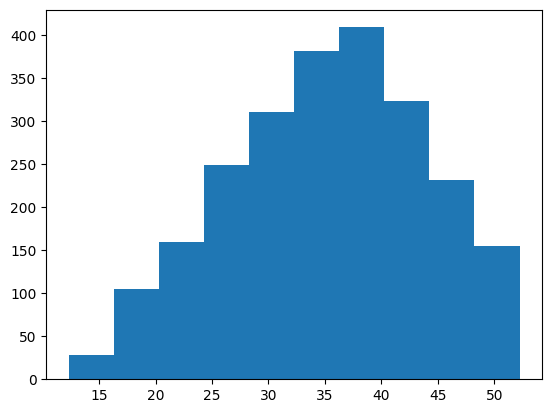

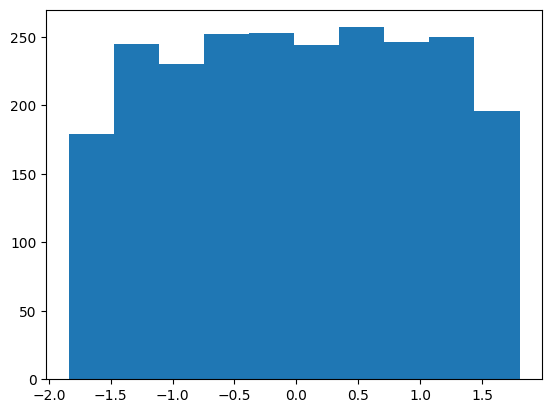

tensor(35.1749)
tensor(3.1627e-08, grad_fn=<MeanBackward0>)
tensor(8.6749)
tensor(1.0002, grad_fn=<StdBackward0>)


In [43]:
import torch
import torch.nn as nn
img_fake = torch.randint(300,1000,(1,3,28,28),dtype=torch.float32)
print(torch.mean(img_fake))
print(torch.std(img_fake))

lrn = nn.LocalResponseNorm(3,alpha=0.001,beta=0.5,k=1)
bn = nn.BatchNorm2d(3)

img_fake_lrn = lrn(img_fake)
img_fake_bn = bn(img_fake)

plt.hist(img_fake.detach().numpy().reshape(-1))
plt.show()
plt.hist(img_fake_lrn.detach().numpy().reshape(-1))
plt.show()
plt.hist(img_fake_bn.detach().numpy().reshape(-1))
plt.show()

print(torch.mean(img_fake_lrn))
print(torch.mean(img_fake_bn))
print(torch.std(img_fake_lrn))
print(torch.std(img_fake_bn))

torch.Size([1, 1, 535, 886])


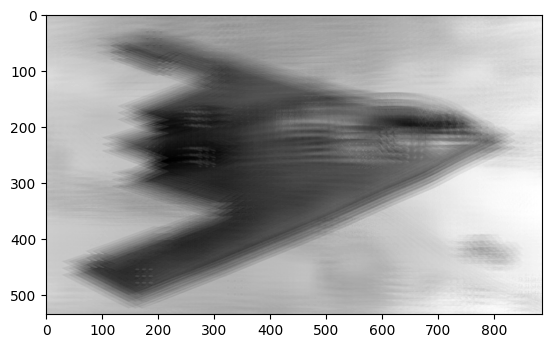

In [66]:
conv_tmp = nn.Conv2d(1,1,(3,3),padding=0,dilation=12,bias=False)
# initialize the weights of the convolutional layer to be all zeros except the center
conv_tmp.weight.data = torch.ones_like(conv_tmp.weight.data)/9.
#conv_tmp.weight.data[0,0,1,1] = 1
img = np.array(Image.open('../stealth.jpg').convert('L')).reshape(1,1,559,910)/255.0
img = torch.tensor(img,dtype=torch.float32)
img_conv = conv_tmp(img)
print(img_conv.shape)
plt.imshow(img_conv[0,0].detach().numpy(),cmap='gray')


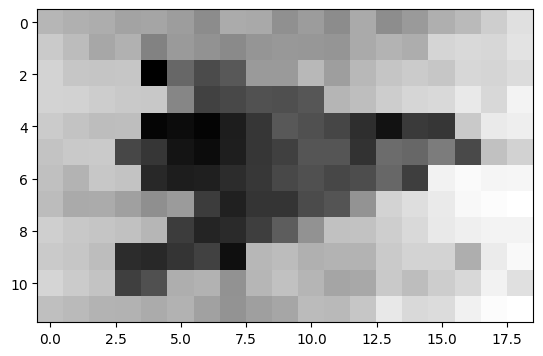

In [60]:
img_orig = np.array(Image.open('../stealth.jpg').convert('L'))
plt.imshow(img_orig[::50,::50],cmap='gray')

In [70]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [92]:
def apply_affine_complete(img,theta=0,tx=0,ty=0,cx=1,cy=1,sv=0,sh=0):
    A = np.eye(3)
    A[0,2] = tx
    A[1,2] = ty
    B = np.eye(3)
    B[0,0] = cx
    B[1,1] = cy
    theta = np.deg2rad(theta)
    C = np.array([
        [np.cos(theta),-np.sin(theta),0],
        [np.sin(theta),np.cos(theta),0],
        [0,0,1]
    ]) 
    D = np.eye(3)
    D[0,1] = sv
    E = np.eye(3)
    E[1,0] = sh
    mat = A @ B @ C @ D @ E
    ret = np.zeros_like(img)
    m,n = img.shape
    for i in range(m):
        for j in range(n):
            [x_,y_,_] = mat @ np.array([i,j,1])
            if x_>=0 and x_<m and y_>=0 and y_<n:
                ret[int(x_),int(y_)] = img[i,j]
    return ret


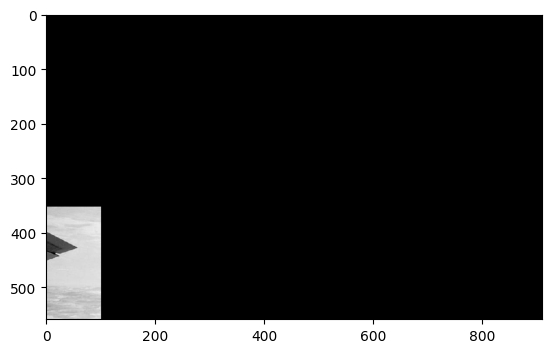

In [91]:
img = np.array(Image.open('../stealth.jpg').convert('L'))/255.0
img_affine = apply_affine(img,180,800,100,0.8,0.8)
plt.imshow(img_affine,cmap='gray')